# Imbalanced learning tutorial

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Apply SMOTE to oversample the original data
from imblearn.over_sampling import SMOTE
# Apply Neighbourhood Cleaning Rule to undersample the original data
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score



In [42]:
# Define the number of samples for each class
n_majority = 9500
n_minority = 500

## Creating the significant overlap scenario

*** Imbalance percentage ***
5.26%



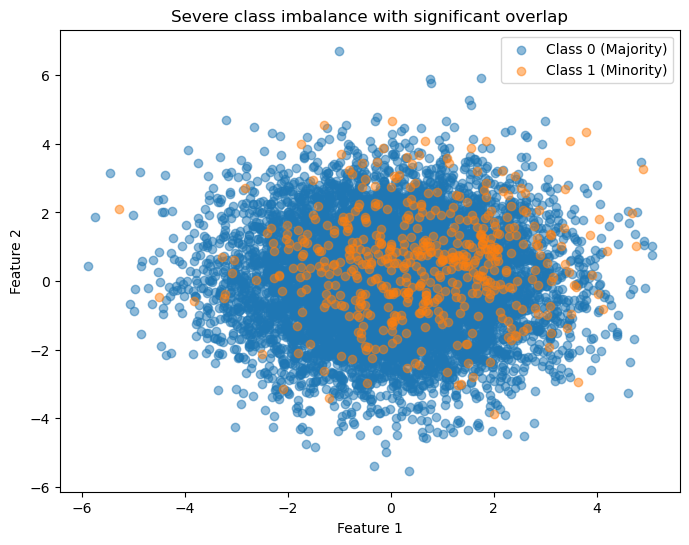

In [43]:

# Set random seed for reproducibility
np.random.seed(42)

#imbalance ratio
imbalance_ratio = n_minority / n_majority

# Generate majority class (Class 0) - Clustered around (0,0)
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))

# Generate minority class (Class 1) - Overlapping but slightly shifted
minority_class = np.random.normal(loc=[0.5, 0.5], scale=[1.5, 1.5], size=(n_minority, 2))

# Create labels
labels_majority = np.zeros(n_majority)
labels_minority = np.ones(n_minority)

# Combine data
X = np.vstack((majority_class, minority_class))
y = np.hstack((labels_majority, labels_minority))

# Create a DataFrame
df_significant = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df_significant['Class'] = y.astype(int)

print("*** Imbalance percentage ***")
print(f"{round(imbalance_ratio * 100,2)}%")
print()

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_significant[df_significant['Class'] == 0]['Feature_1'], df_significant[df_significant['Class'] == 0]['Feature_2'], label="Class 0 (Majority)", alpha=0.5)
plt.scatter(df_significant[df_significant['Class'] == 1]['Feature_1'], df_significant[df_significant['Class'] == 1]['Feature_2'], label="Class 1 (Minority)", alpha=0.5)
plt.legend()
plt.title("Severe class imbalance with significant overlap")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Creating the no overlap scenario

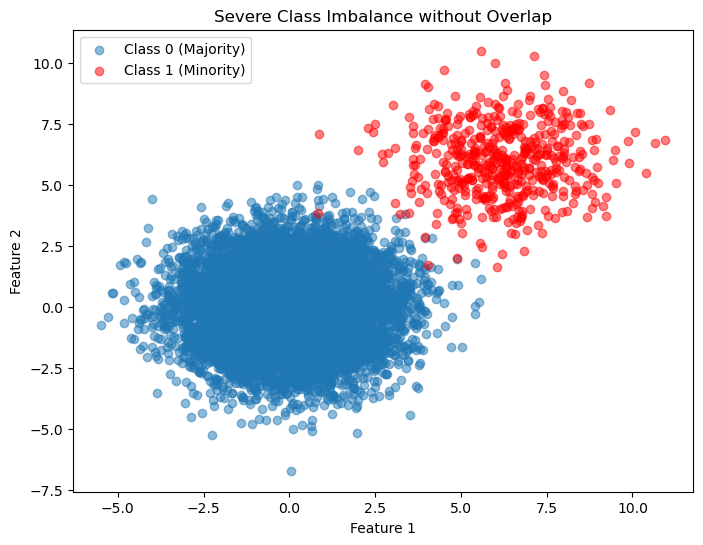

In [44]:
# Generate majority class (Class 0) - Clustered around (0,0)
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))

# Generate minority class (Class 1) - Clearly separated
minority_class = np.random.normal(loc=[6, 6], scale=[1.5, 1.5], size=(n_minority, 2))

# Create labels
labels_majority = np.zeros(n_majority)
labels_minority = np.ones(n_minority)

# Combine data
X_separated = np.vstack((majority_class, minority_class))
y_separated = np.hstack((labels_majority, labels_minority))

# Create a DataFrame
df_separated = pd.DataFrame(X_separated, columns=['Feature_1', 'Feature_2'])
df_separated['Class'] = y_separated.astype(int)


# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_separated[df_separated['Class'] == 0]['Feature_1'], df_separated[df_separated['Class'] == 0]['Feature_2'], label="Class 0 (Majority)", alpha=0.5)
plt.scatter(df_separated[df_separated['Class'] == 1]['Feature_1'], df_separated[df_separated['Class'] == 1]['Feature_2'], label="Class 1 (Minority)", alpha=0.5, color='r')
plt.legend()
plt.title("Severe Class Imbalance without Overlap")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Creating the moderate overlap scenario

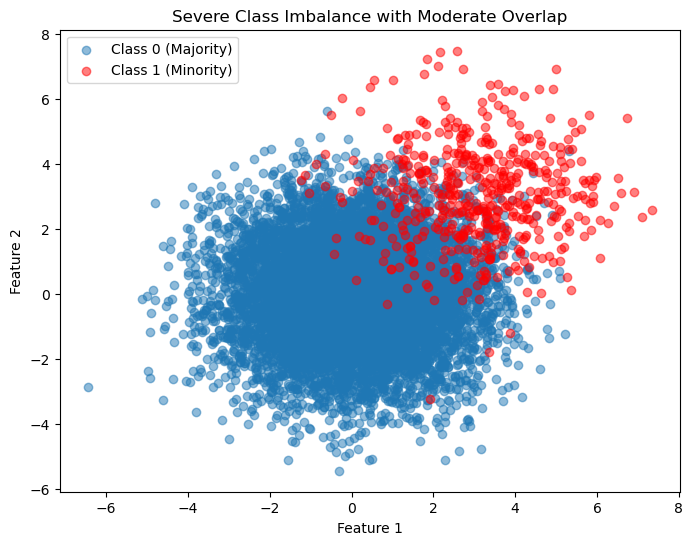

In [45]:
# Generate majority class (Class 0) - Clustered around (0,0)
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))

# Generate minority class (Class 1) - Moderately overlapping with a slight shift
minority_class = np.random.normal(loc=[3, 3], scale=[1.5, 1.5], size=(n_minority, 2))

# Create labels
labels_majority = np.zeros(n_majority)
labels_minority = np.ones(n_minority)

# Combine data
X_moderate = np.vstack((majority_class, minority_class))
y_moderate = np.hstack((labels_majority, labels_minority))

# Create a DataFrame
df_moderate = pd.DataFrame(X_moderate, columns=['Feature_1', 'Feature_2'])
df_moderate['Class'] = y_moderate.astype(int)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_moderate[df_moderate['Class'] == 0]['Feature_1'], df_moderate[df_moderate['Class'] == 0]['Feature_2'], label="Class 0 (Majority)", alpha=0.5)
plt.scatter(df_moderate[df_moderate['Class'] == 1]['Feature_1'], df_moderate[df_moderate['Class'] == 1]['Feature_2'], label="Class 1 (Minority)", alpha=0.5, color='r')
plt.legend()
plt.title("Severe Class Imbalance with Moderate Overlap")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()







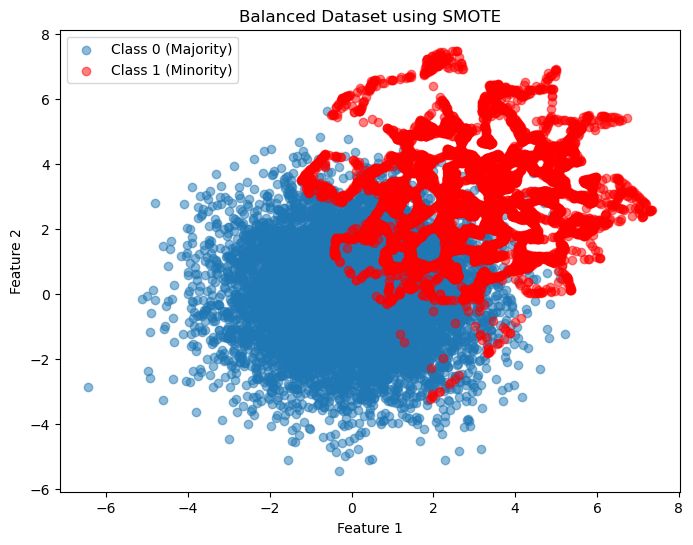

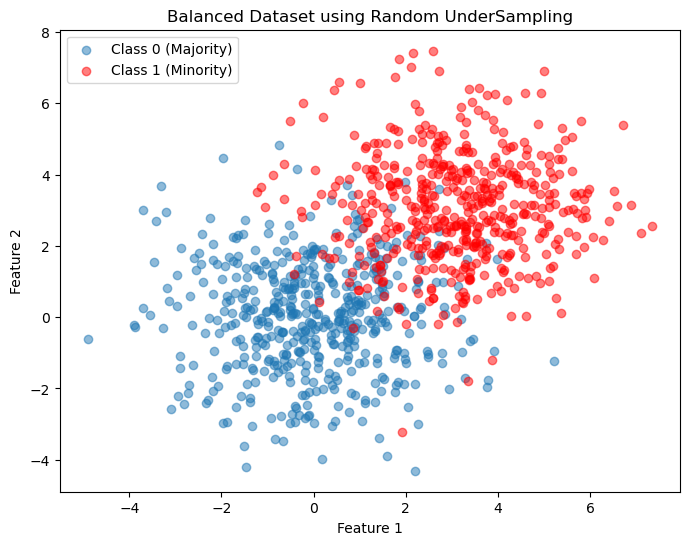

In [46]:
# Initialize SMOTE object
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(df_moderate[['Feature_1', 'Feature_2']], df_moderate['Class'])

# Create a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=['Feature_1', 'Feature_2'])
df_resampled['Class'] = y_resampled.astype(int)


# Plot the resampled dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_resampled[df_resampled['Class'] == 0]['Feature_1'], df_resampled[df_resampled['Class'] == 0]['Feature_2'], label="Class 0 (Majority)", alpha=0.5)
plt.scatter(df_resampled[df_resampled['Class'] == 1]['Feature_1'], df_resampled[df_resampled['Class'] == 1]['Feature_2'], label="Class 1 (Minority)", alpha=0.5, color='r')
plt.legend()
plt.title("Balanced Dataset using SMOTE")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Initialize RandomUnderSampler object
ncr = RandomUnderSampler(sampling_strategy='majority')

# Apply RandomUnderSampler to generate undersampled data
X_resampled, y_resampled = ncr.fit_resample(df_moderate[['Feature_1', 'Feature_2']], df_moderate['Class'])

# Create a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=['Feature_1', 'Feature_2'])
df_resampled['Class'] = y_resampled.astype(int)

# Plot the resampled dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_resampled[df_resampled['Class'] == 0]['Feature_1'], df_resampled[df_resampled['Class'] == 0]['Feature_2'], label="Class 0 (Majority)", alpha=0.5)
plt.scatter(df_resampled[df_resampled['Class'] == 1]['Feature_1'], df_resampled[df_resampled['Class'] == 1]['Feature_2'], label="Class 1 (Minority)", alpha=0.5, color='r')
plt.legend()
plt.title("Balanced Dataset using Random UnderSampling")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [47]:


# Function to train classifiers and report performance
def evaluate_classifiers(df, dataset_name):
    X = df[['Feature_1', 'Feature_2']].values
    y = df['Class'].values

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Initialize classifiers
    classifiers = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM": SVC(random_state=42)
    }

    results = {}

    # Train and evaluate each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = report

    return results

# Evaluate classifiers on the three datasets
results_severe_overlap = evaluate_classifiers(df_significant, "Severe Overlap")
results_no_overlap = evaluate_classifiers(df_separated, "No Overlap")
results_moderate_overlap = evaluate_classifiers(df_moderate, "Moderate Overlap")

# Display results
results_summary = {
    "Dataset": [],
    "Classifier": [],
    "Precision (Class 1)": [],
    "Recall (Class 1)": [],
    "F1-Score (Class 1)": [],
    "Accuracy": []
}

for dataset_name, results in zip(
    ["Severe Overlap", "No Overlap", "Moderate Overlap"],
    [results_severe_overlap, results_no_overlap, results_moderate_overlap]
):
    for clf_name, metrics in results.items():
        results_summary["Dataset"].append(dataset_name)
        results_summary["Classifier"].append(clf_name)
        results_summary["Precision (Class 1)"].append(metrics["1"]["precision"])
        results_summary["Recall (Class 1)"].append(metrics["1"]["recall"])
        results_summary["F1-Score (Class 1)"].append(metrics["1"]["f1-score"])
        results_summary["Accuracy"].append(metrics["accuracy"])

df_results = pd.DataFrame(results_summary)

c:\Users\he162696\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\he162696\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\he162696\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Dataset     Classifier  Precision (Class 1)  Recall (Class 1)  \
0    Severe Overlap  Random Forest             0.000000          0.000000   
1    Severe Overlap            SVM             0.000000          0.000000   
2        No Overlap  Random Forest             0.993289          0.986667   
3        No Overlap            SVM             1.000000          0.986667   
4  Moderate Overlap  Random Forest             0.813953          0.700000   
5  Moderate Overlap            SVM             0.872727          0.640000   

   F1-Score (Class 1)  Accuracy  
0            0.000000  0.946333  
1            0.000000  0.950000  
2            0.989967  0.999000  
3            0.993289  0.999333  
4            0.752688  0.977000  
5            0.738462  0.977333

In [ ]:


# Function to compute AUC scores
def compute_auc_scores(df, dataset_name):
    X = df[['Feature_1', 'Feature_2']].values
    y = df['Class'].values

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Initialize classifiers with probability estimation enabled
    classifiers = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM": SVC(random_state=42, probability=True)
    }

    auc_scores = []

    # Train and evaluate each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for Class 1
        auc = roc_auc_score(y_test, y_prob)
        auc_scores.append({"Dataset": dataset_name, "Classifier": name, "AUC Score": auc})

    return auc_scores

# Compute AUC scores for each dataset
auc_results = []
auc_results.extend(compute_auc_scores(df, "Severe Overlap"))
auc_results.extend(compute_auc_scores(df_separated, "No Overlap"))
auc_results.extend(compute_auc_scores(df_moderate, "Moderate Overlap"))

# Convert to DataFrame and display
df_auc_results = pd.DataFrame(auc_results)

Dataset     Classifier  AUC Score
0    Severe Overlap  Random Forest   0.538480
1    Severe Overlap            SVM   0.440234
2        No Overlap  Random Forest   0.999986
3        No Overlap            SVM   0.999993
4  Moderate Overlap  Random Forest   0.952288
5  Moderate Overlap            SVM   0.933883

In [ ]:


# Function to compute Balanced Accuracy scores
def compute_balanced_accuracy_scores(df, dataset_name):
    X = df[['Feature_1', 'Feature_2']].values
    y = df['Class'].values

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Initialize classifiers
    classifiers = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM": SVC(random_state=42)
    }

    balanced_acc_scores = []

    # Train and evaluate each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)  # Get predicted labels
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        balanced_acc_scores.append({"Dataset": dataset_name, "Classifier": name, "Balanced Accuracy Score": balanced_acc})

    return balanced_acc_scores

# Compute Balanced Accuracy scores for each dataset
balanced_acc_results = []
balanced_acc_results.extend(compute_balanced_accuracy_scores(df, "Severe Overlap"))
balanced_acc_results.extend(compute_balanced_accuracy_scores(df_separated, "No Overlap"))
balanced_acc_results.extend(compute_balanced_accuracy_scores(df_moderate, "Moderate Overlap"))

# Convert to DataFrame and display
df_balanced_acc_results = pd.DataFrame(balanced_acc_results)

Dataset     Classifier  Balanced Accuracy Score
0    Severe Overlap  Random Forest                 0.494737
1    Severe Overlap            SVM                 0.500000
2        No Overlap  Random Forest                 0.993158
3        No Overlap            SVM                 0.993333
4  Moderate Overlap  Random Forest                 0.845789
5  Moderate Overlap            SVM                 0.817544

In [53]:
# Merge df_auc_results and df_balanced_acc_results on 'Dataset' and 'Classifier'
df_merged = pd.merge(df_results, df_balanced_acc_results, on=['Dataset', 'Classifier'])
# Merge the result with df_svm_results_fixed on 'Dataset' and 'Classifier'
df_merged = pd.merge(df_merged, df_auc_results, on=['Dataset', 'Classifier'])

# Display the merged dataframe
df_merged.head(20)

Dataset     Classifier  Precision (Class 1)  Recall (Class 1)  \
0    Severe Overlap  Random Forest             0.000000          0.000000   
1    Severe Overlap            SVM             0.000000          0.000000   
2        No Overlap  Random Forest             0.993289          0.986667   
3        No Overlap            SVM             1.000000          0.986667   
4  Moderate Overlap  Random Forest             0.813953          0.700000   
5  Moderate Overlap            SVM             0.872727          0.640000   

   F1-Score (Class 1)  Accuracy  Balanced Accuracy Score  AUC Score  
0            0.000000  0.946333                 0.494737   0.538480  
1            0.000000  0.950000                 0.500000   0.440234  
2            0.989967  0.999000                 0.993158   0.999986  
3            0.993289  0.999333                 0.993333   0.999993  
4            0.752688  0.977000                 0.845789   0.952288  
5            0.738462  0.977333                 0.817544   0.933883

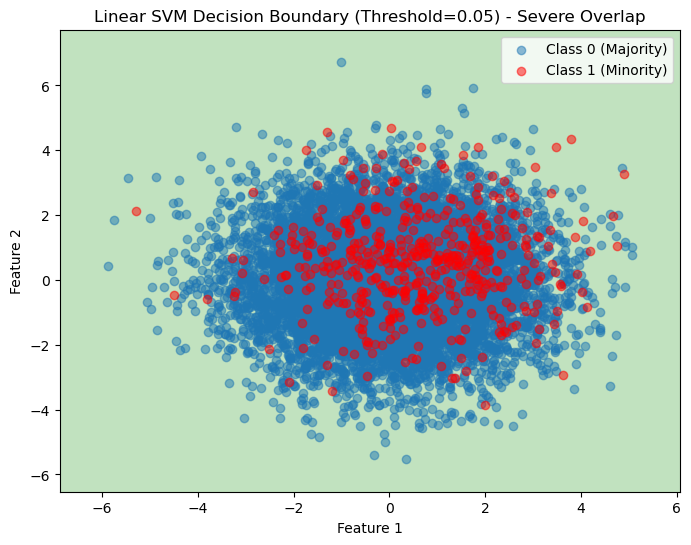

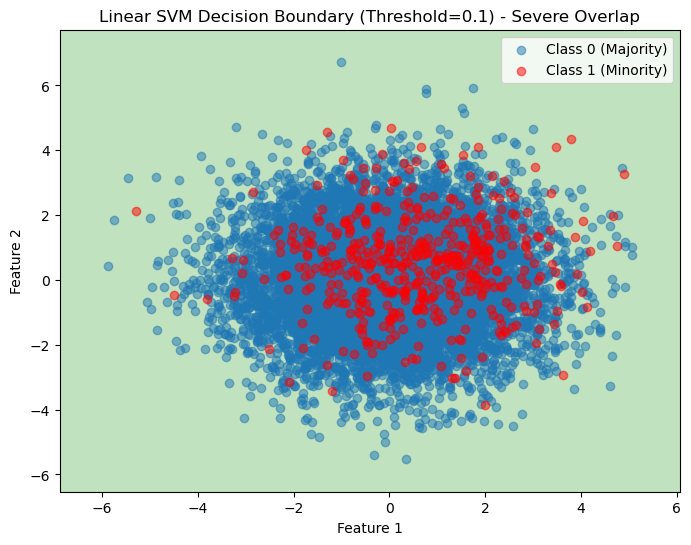

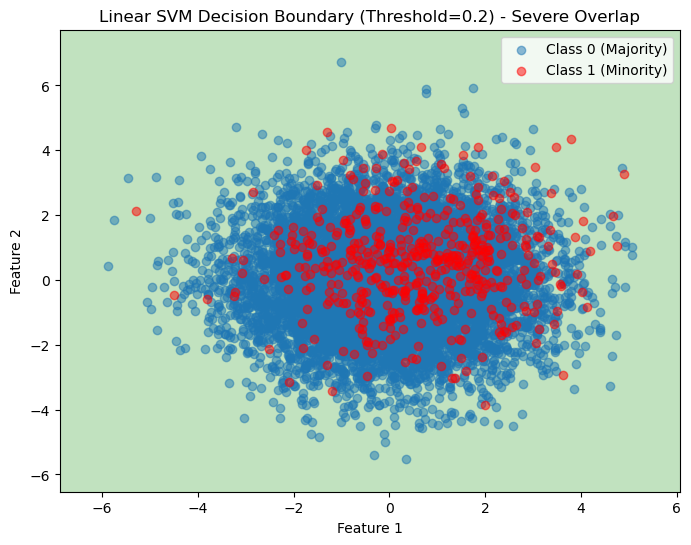

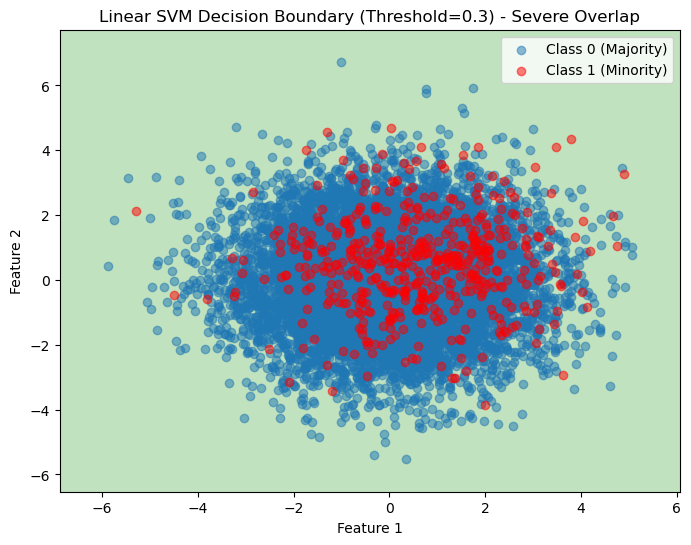

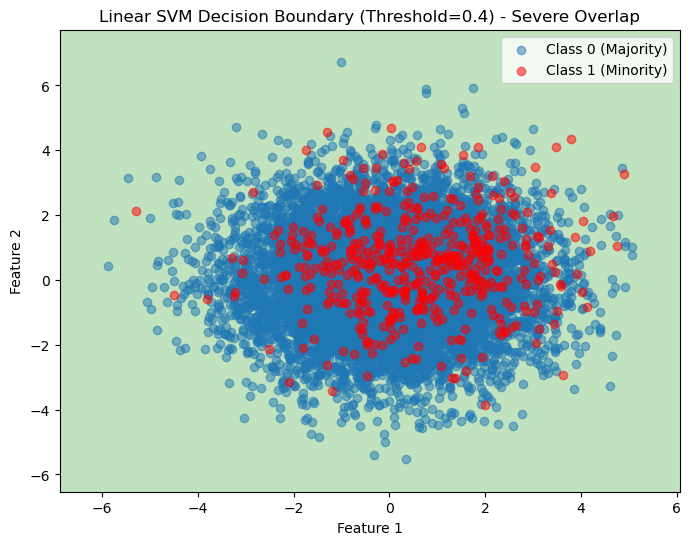

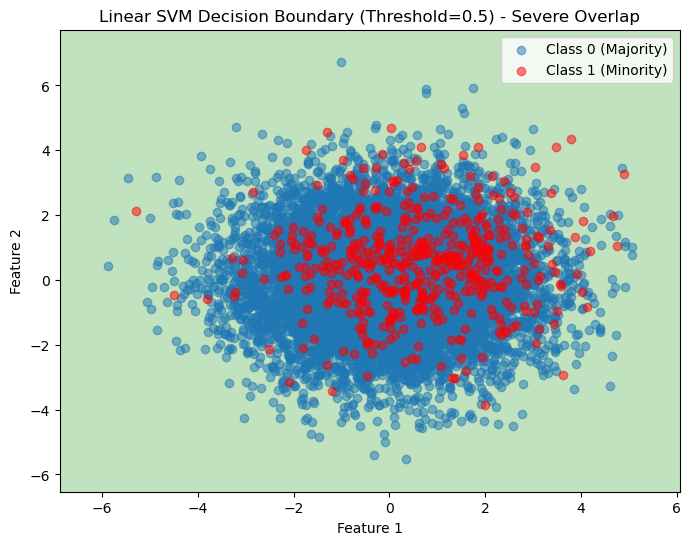

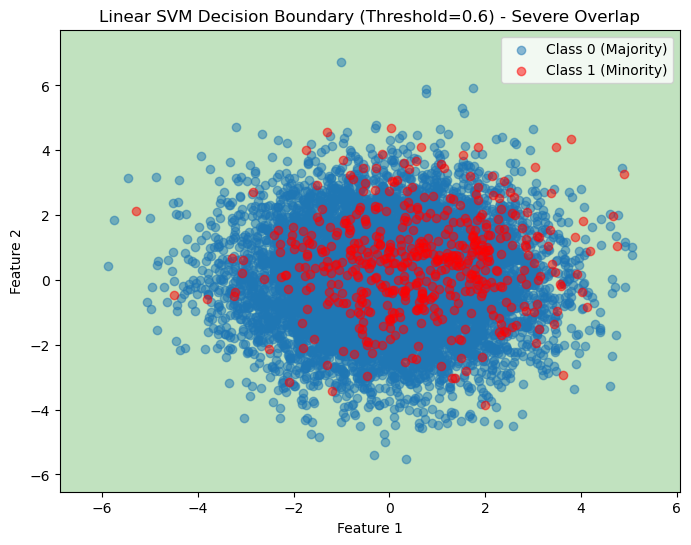

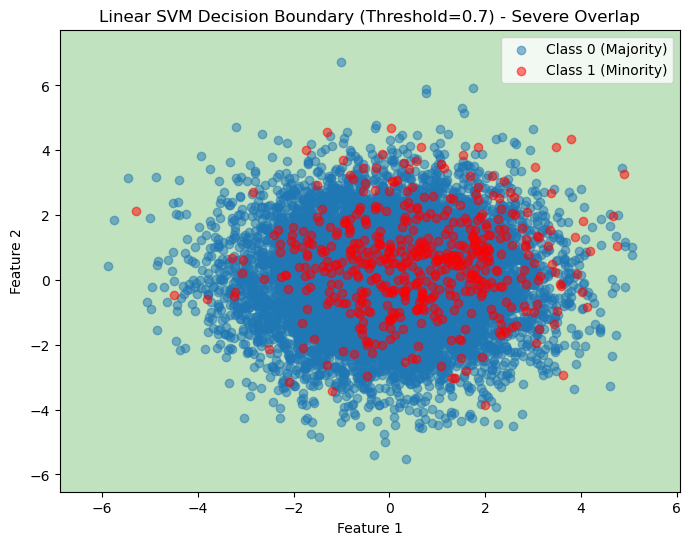

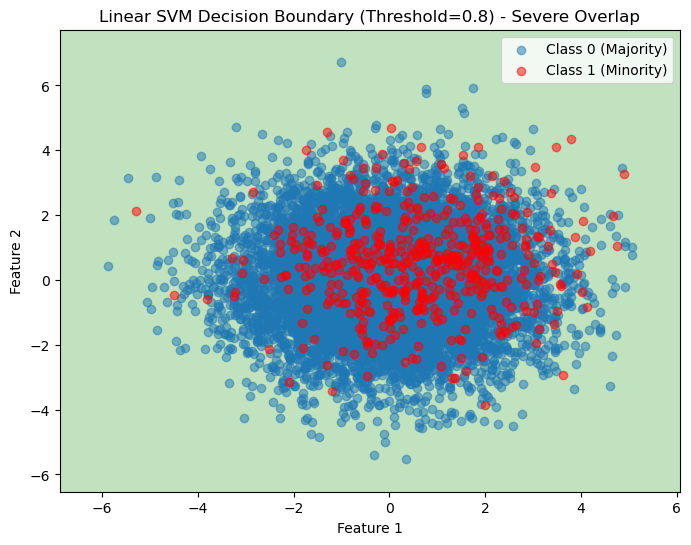

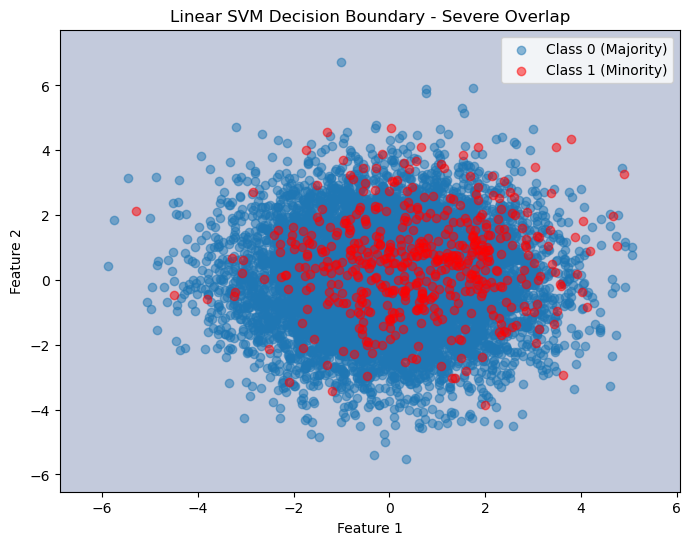

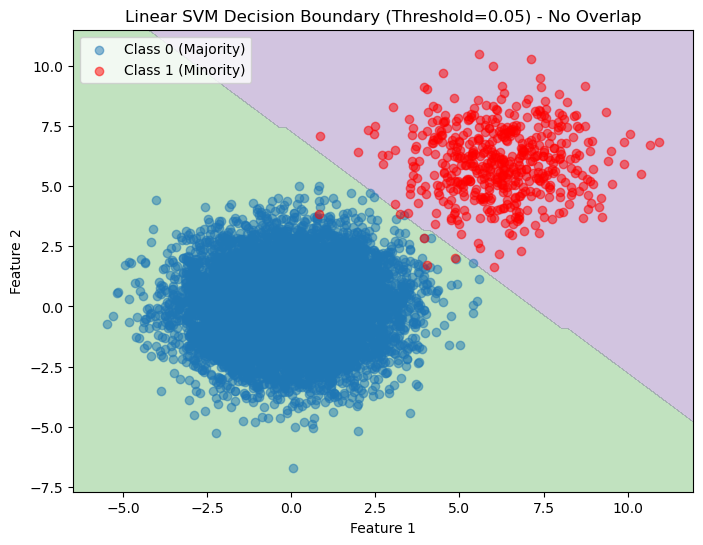

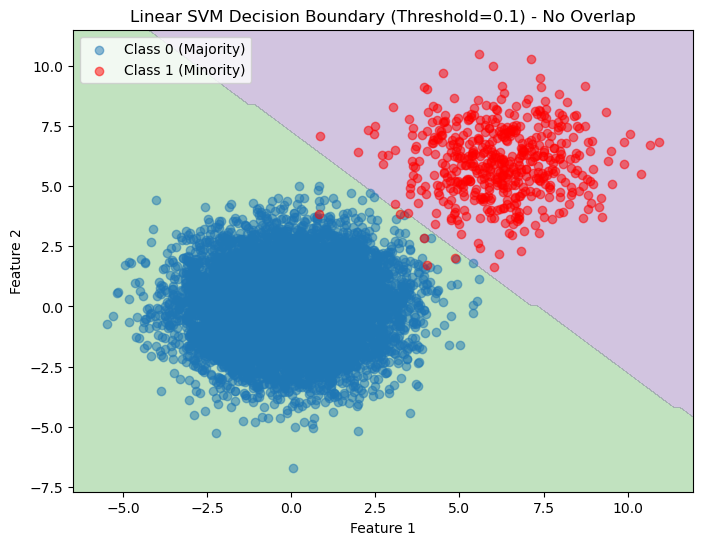

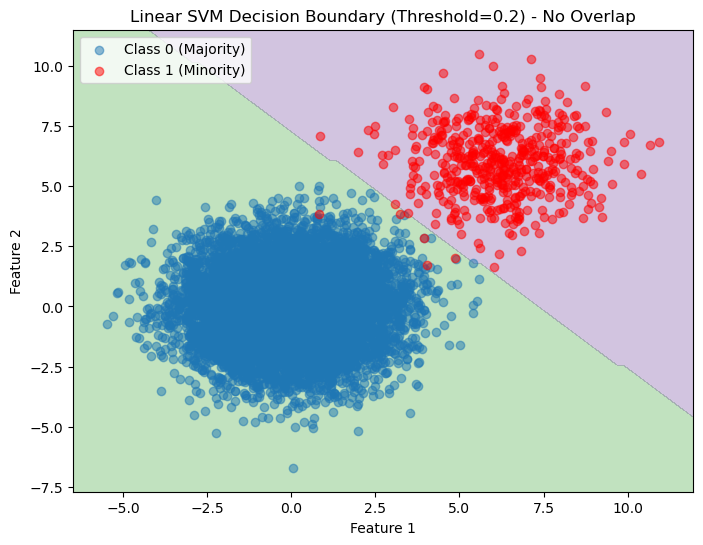

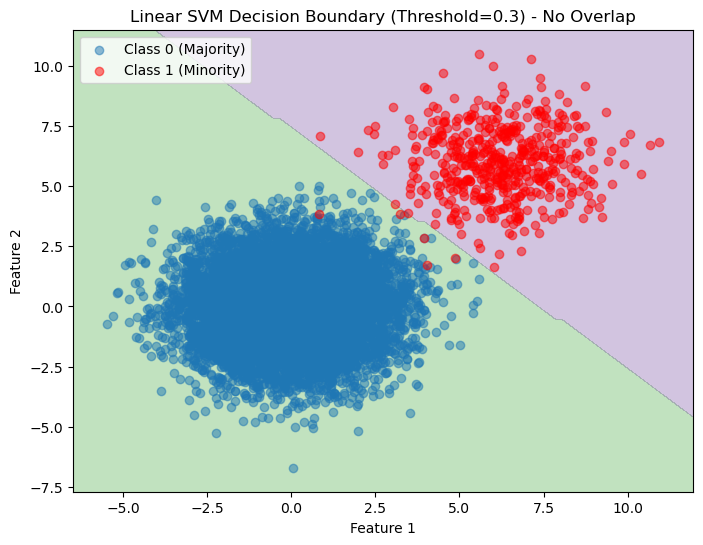

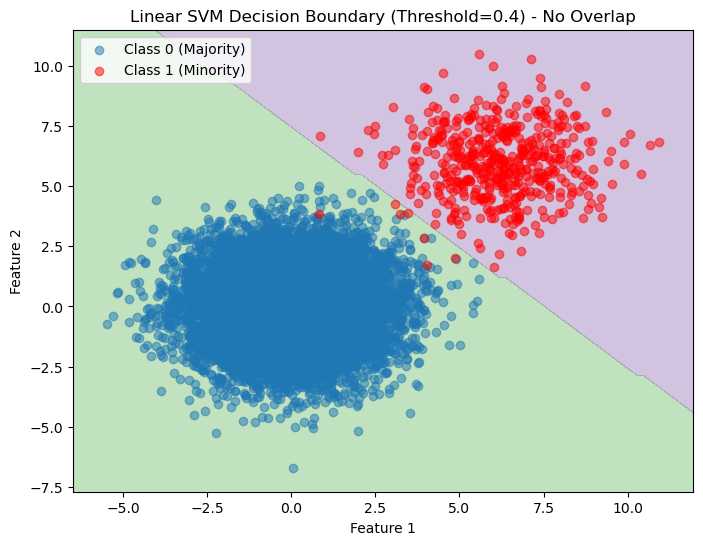

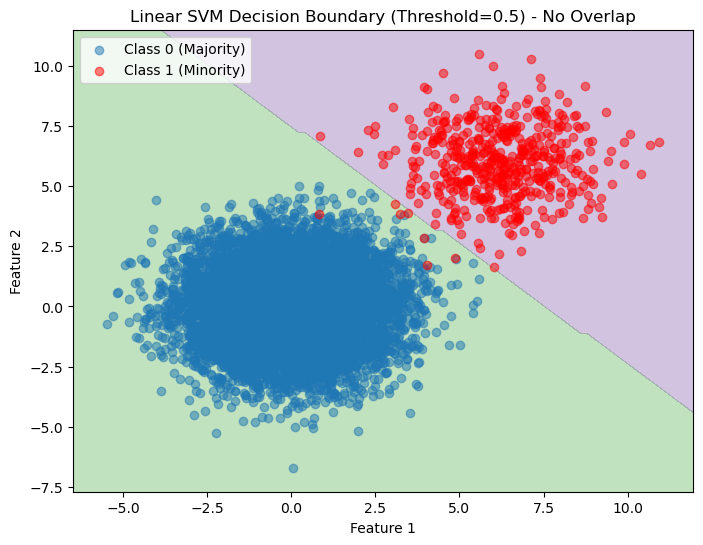

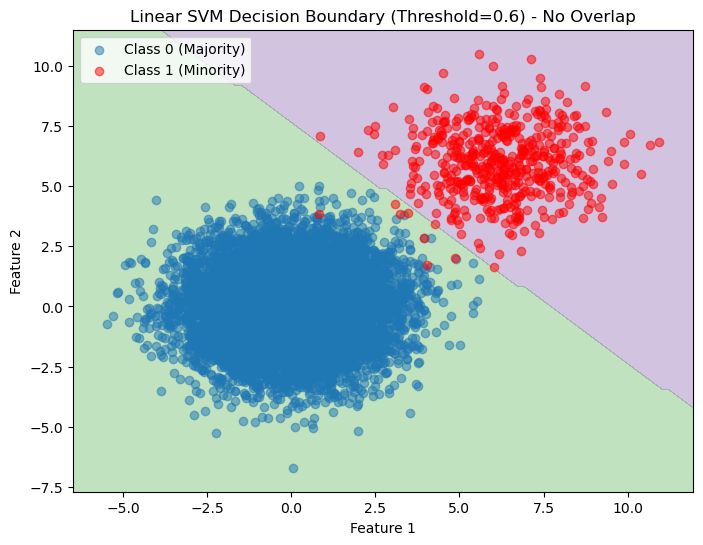

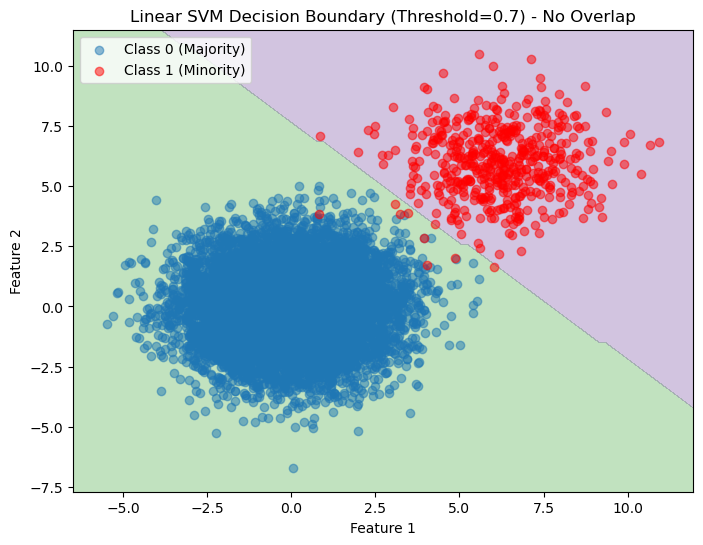

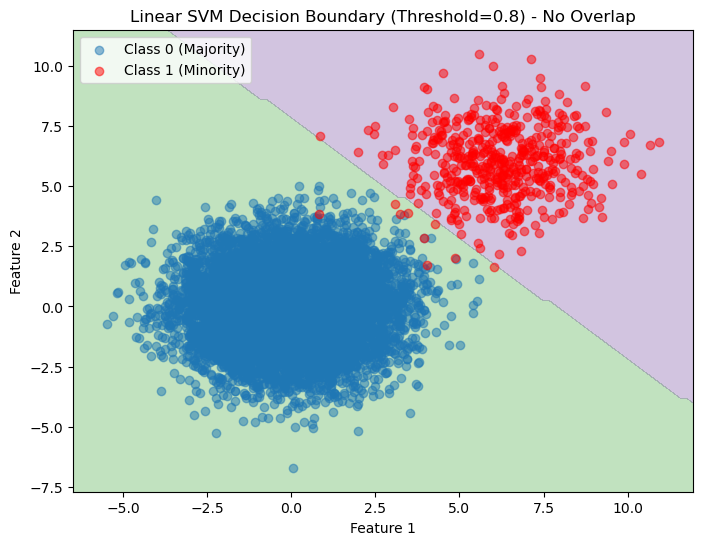

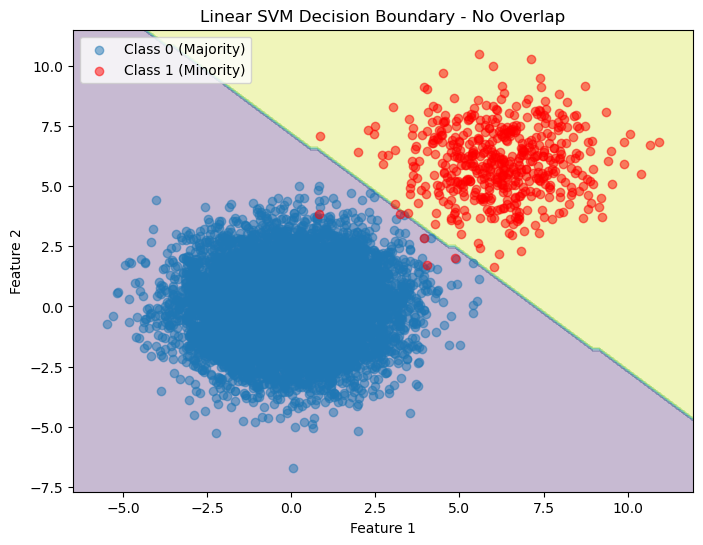

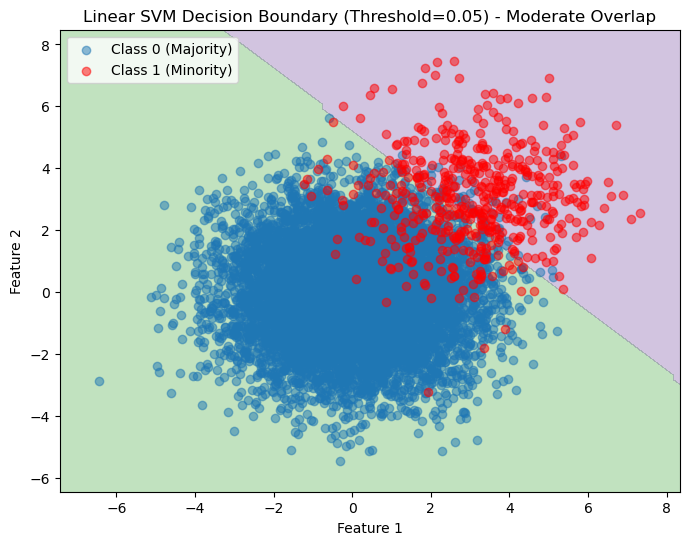

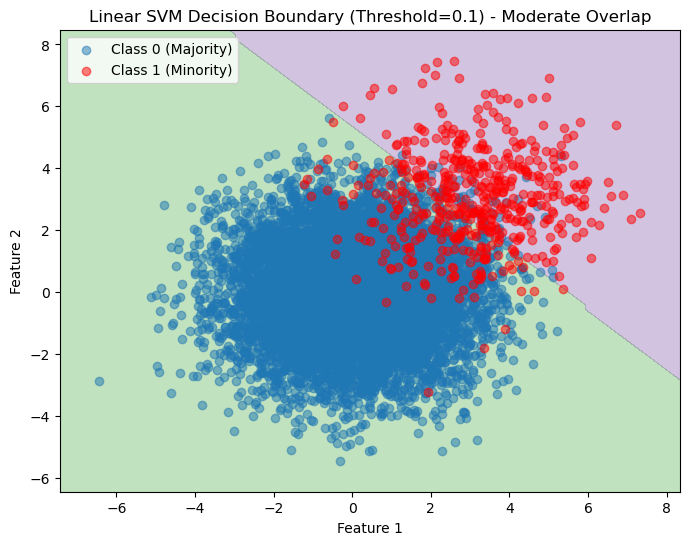

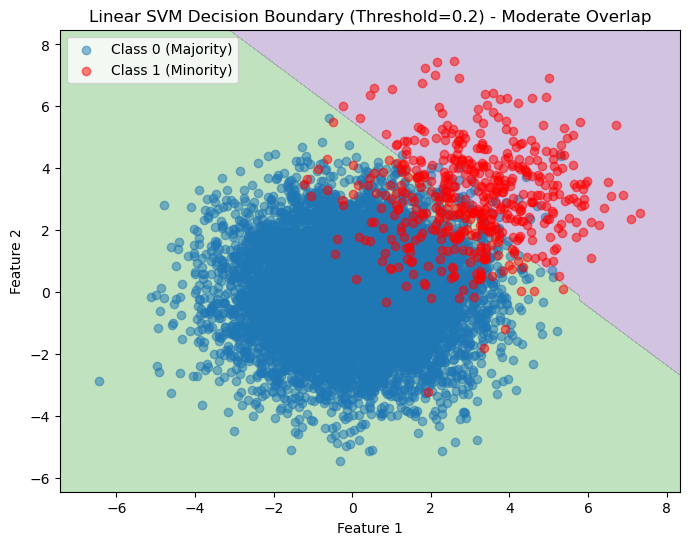

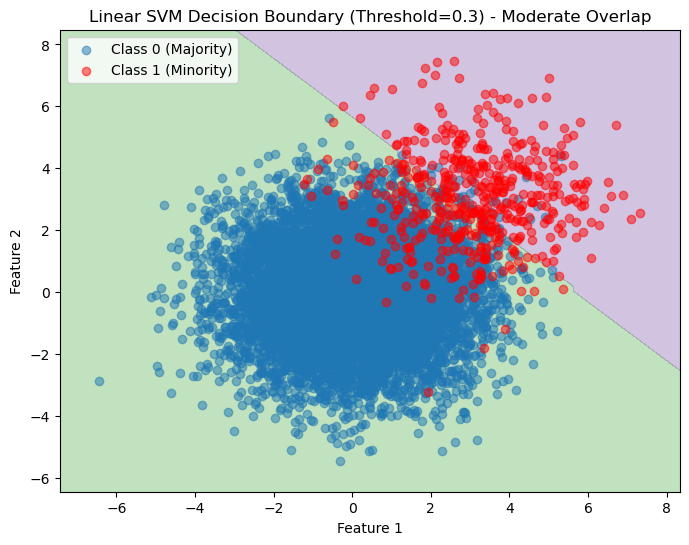

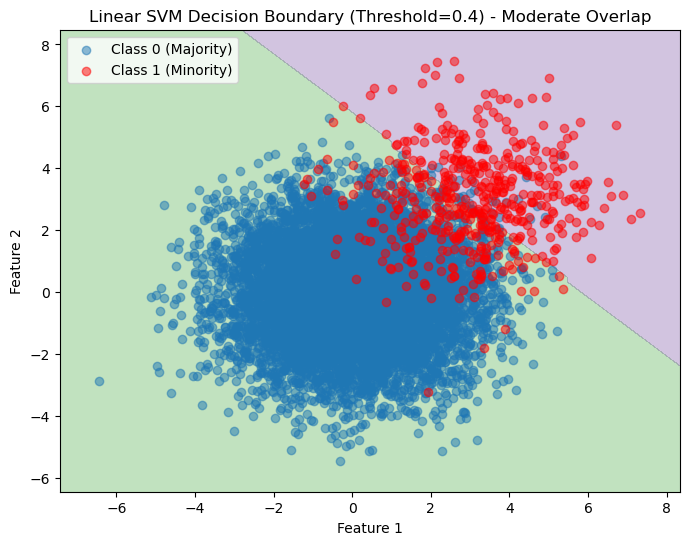

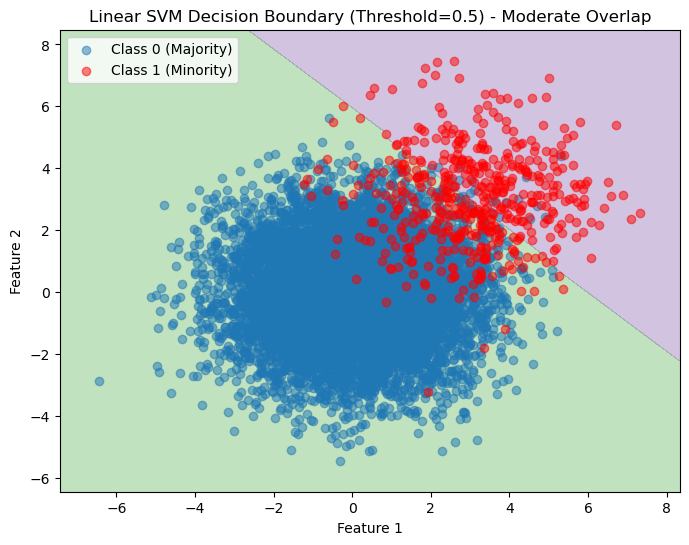

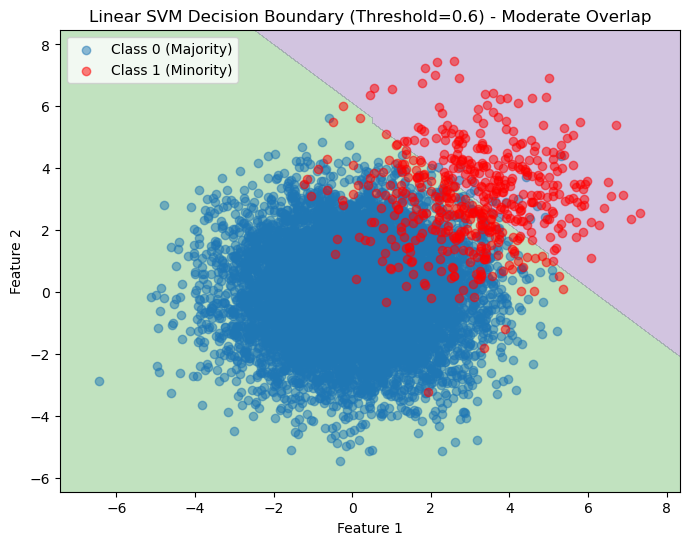

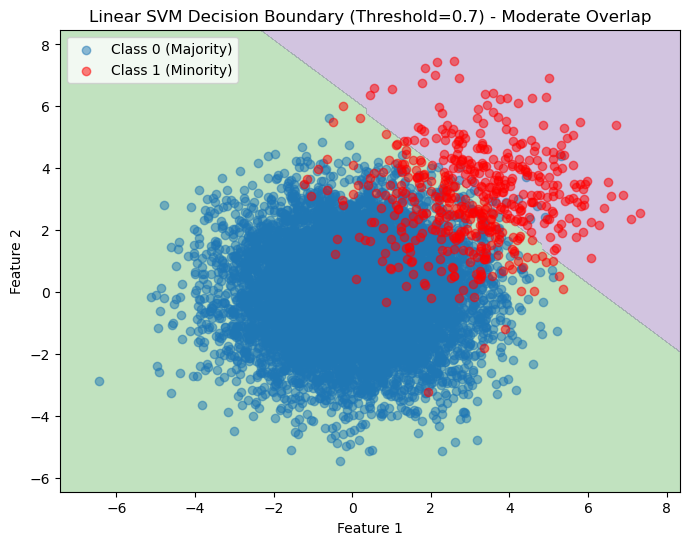

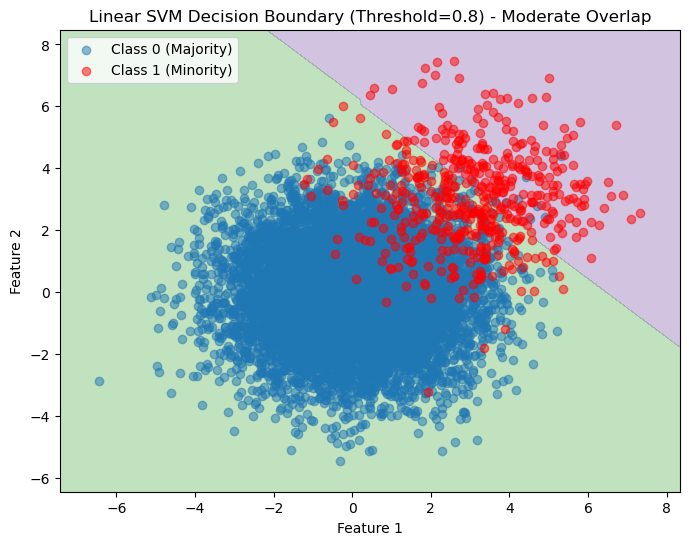

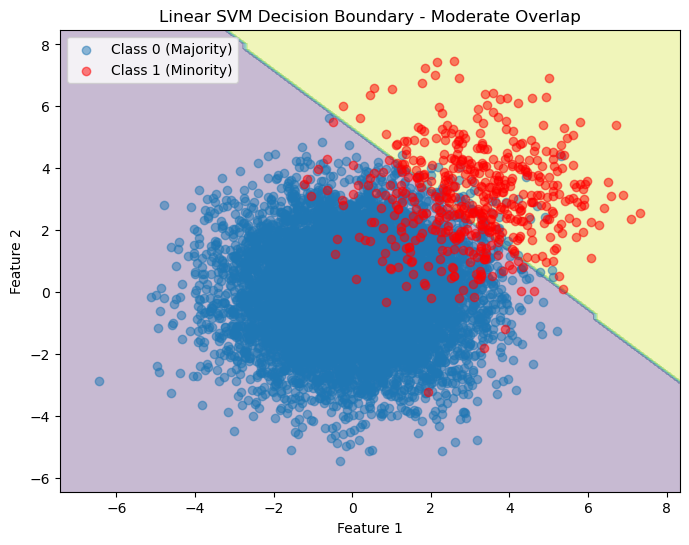

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate datasets with different levels of class overlap
# Severe Overlap
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))
minority_class = np.random.normal(loc=[0.5, 0.5], scale=[1.5, 1.5], size=(n_minority, 2))
X_severe = np.vstack((majority_class, minority_class))
y_severe = np.hstack((np.zeros(n_majority), np.ones(n_minority)))

# No Overlap
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))
minority_class = np.random.normal(loc=[6, 6], scale=[1.5, 1.5], size=(n_minority, 2))
X_no_overlap = np.vstack((majority_class, minority_class))
y_no_overlap = np.hstack((np.zeros(n_majority), np.ones(n_minority)))

# Moderate Overlap
majority_class = np.random.normal(loc=[0, 0], scale=[1.5, 1.5], size=(n_majority, 2))
minority_class = np.random.normal(loc=[3, 3], scale=[1.5, 1.5], size=(n_minority, 2))
X_moderate = np.vstack((majority_class, minority_class))
y_moderate = np.hstack((np.zeros(n_majority), np.ones(n_minority)))

# Function to plot decision boundaries
def plot_decision_boundary(X, y, clf, dataset_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    thresholds = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
    for threshold in thresholds:
        Z = (clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) > threshold).astype(int)
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], cmap=plt.cm.Paired)
        plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0 (Majority)", alpha=0.5)
        plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1 (Minority)", alpha=0.5, color='r')
        plt.legend()
        plt.title(f"Linear SVM Decision Boundary (Threshold={threshold}) - {dataset_name}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0 (Majority)", alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1 (Minority)", alpha=0.5, color='r')
    plt.legend()
    plt.title(f"Linear SVM Decision Boundary - {dataset_name}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Function to train and plot Linear SVM decision boundaries
def apply_linear_svm_and_plot(X, y, dataset_name):
    # Train Linear SVM
    clf = SVC(kernel="linear", random_state=42)
    clf.fit(X, y)

    # Plot decision boundary
    plot_decision_boundary(X, y, clf, dataset_name)

# Apply Linear SVM and plot decision boundaries for each dataset
apply_linear_svm_and_plot(X_severe, y_severe, "Severe Overlap")
apply_linear_svm_and_plot(X_no_overlap, y_no_overlap, "No Overlap")
apply_linear_svm_and_plot(X_moderate, y_moderate, "Moderate Overlap")


In [34]:
# Function to evaluate the Linear SVM model and compute metrics robustly
def evaluate_linear_svm_fixed(X, y, dataset_name):
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Train Linear SVM
    clf = SVC(kernel="linear", random_state=42, probability=True)
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]  # Get probability estimates for AUC

    # Compute metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_prob)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    # Handle cases where Class 1 is not predicted
    print(report)
    return {
        "Dataset": dataset_name,
        "Precision (Class 1)": report["1.0"]["precision"],
        "Recall (Class 1)": report["1.0"]["recall"],
        "F1-Score (Class 1)": report["1.0"]["f1-score"],
        "Accuracy": report["accuracy"],
        "AUC Score": auc,
        "Balanced Accuracy Score": balanced_acc,
    }

# Evaluate the Linear SVM on each dataset
svm_results_fixed = []
svm_results_fixed.append(evaluate_linear_svm_fixed(X_severe, y_severe, "Severe Overlap"))
svm_results_fixed.append(evaluate_linear_svm_fixed(X_no_overlap, y_no_overlap, "No Overlap"))
svm_results_fixed.append(evaluate_linear_svm_fixed(X_moderate, y_moderate, "Moderate Overlap"))

# Convert to DataFrame and display results
df_svm_results_fixed = pd.DataFrame(svm_results_fixed)
df_svm_results_fixed.head(20)


{'0.0': {'precision': 0.95, 'recall': 1.0, 'f1-score': 0.9743589743589743, 'support': 285.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15.0}, 'accuracy': 0.95, 'macro avg': {'precision': 0.475, 'recall': 0.5, 'f1-score': 0.48717948717948717, 'support': 300.0}, 'weighted avg': {'precision': 0.9025, 'recall': 0.95, 'f1-score': 0.9256410256410256, 'support': 300.0}}
{'0.0': {'precision': 1.0, 'recall': 0.9964912280701754, 'f1-score': 0.9982425307557118, 'support': 285.0}, '1.0': {'precision': 0.9375, 'recall': 1.0, 'f1-score': 0.967741935483871, 'support': 15.0}, 'accuracy': 0.9966666666666667, 'macro avg': {'precision': 0.96875, 'recall': 0.9982456140350877, 'f1-score': 0.9829922331197913, 'support': 300.0}, 'weighted avg': {'precision': 0.996875, 'recall': 0.9966666666666667, 'f1-score': 0.9967175009921198, 'support': 300.0}}
{'0.0': {'precision': 0.9625850340136054, 'recall': 0.9929824561403509, 'f1-score': 0.9775474956822107, 'support': 285.0}, '1.0': {'pre

c:\Users\he162696\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\he162696\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\he162696\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Dataset  Precision (Class 1)  Recall (Class 1)  \
0    Severe Overlap             0.000000          0.000000   
1        No Overlap             0.937500          1.000000   
2  Moderate Overlap             0.666667          0.266667   

   F1-Score (Class 1)  Accuracy  AUC Score  Balanced Accuracy Score  
0            0.000000  0.950000   0.498480                 0.500000  
1            0.967742  0.996667   0.999766                 0.998246  
2            0.380952  0.956667   0.913450                 0.629825